In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [106]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\survey\survey_original.csv')


# Let see the shape and types of features and any null values


In [58]:
df.shape


(141, 39)

# Check the Missing values

In [59]:
df.isnull().sum()


Timestamp                                  0
Industry                                   0
Employees_size                             0
IT_size                                    0
Team_size                                  0
LifeCycle_Software                         0
Software_System                            0
Software_system_architecture               0
Deployable_Components                      0
Runtime_component_instances                0
Component_Communication_Styles             0
Deployed_on                                0
Computing_Model_Layers                     0
Release_automation_rate                    0
upgrades_release rate                      0
System_load_ user_requests                 0
observability_rate                         0
Problem_discover                           0
Incident_first_check_metrics               0
Most_common_incident                       0
Incidents_require_manual_ intervention     0
managed_incidents                         42
Incidents_

# Check the types of the columns whether numerical or  categorical

In [60]:
df.dtypes

Timestamp                                 object
Industry                                  object
Employees_size                            object
IT_size                                   object
Team_size                                 object
LifeCycle_Software                        object
Software_System                           object
Software_system_architecture              object
Deployable_Components                     object
Runtime_component_instances               object
Component_Communication_Styles            object
Deployed_on                               object
Computing_Model_Layers                    object
Release_automation_rate                    int64
upgrades_release rate                     object
System_load_ user_requests                object
observability_rate                         int64
Problem_discover                          object
Incident_first_check_metrics              object
Most_common_incident                      object
Incidents_require_ma

In [ ]:
# All the columns are categorical and see the composition of Data  in each categorical column
#column Timestamp can be removed

In [107]:
col_to_drop=['Third_party_tools ','Timestamp','Alert_percentage','Improve_plan','survey_useful','Reliability_availability','Incidents_require_manual_ intervention', 'managed_incidents','Deployment_techniques'] 
df.drop(columns=col_to_drop,axis =1, inplace=True)


# Data  Analysis

In [64]:
df.columns

Index(['Industry', 'Employees_size  ', 'IT_size', 'Team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', 'Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'Problem_discover',
       'Incident_first_check_metrics', 'Most_common_incident ',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'New_component_in production',
       'Monitoring_information_access', 'Alert_receiver',
       'Receive_alerts_employees', 'Alert_rate', 'Maximum_granularity ',
       'Retention_policy', 'adoption_main_obstacles'],
      dtype='object')

In [65]:
cdf=pd.DataFrame()
colum_name =[]
unique_value=[]
for column in df.columns :
    if df[column].dtypes==object :
        colum_name.append(str(column)) 
        unique_value.append(df[column].nunique())
     
cdf['Column'] = colum_name
cdf['Value']= unique_value
cdf=cdf.sort_values('Value',ascending=False)
cdf

,Column,Value
15,Incident_first_check_metrics,92
14,Problem_discover,62
4,LifeCycle_Software,51
27,adoption_main_obstacles,50
11,Computing_Model_Layers,34
0,Industry,29
6,Software_system_architecture,27
5,Software_System,24
16,Most_common_incident,16
9,Component_Communication_Styles,14


# Handling Rare Categorical Feature
We will remove categorical variables that are present less than 1% of the observations

In [108]:
categorical_features=[column for column in df.columns if df[column].dtypes=='O']
#categorical_features

In [109]:
# As there are many categories inside industry column . we will handle Rare elements in each categorical column
for col in categorical_features:
    temp=df.groupby(col)['Industry'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[col]=np.where(df[col].isin(temp_df),df[col],'Other')

In [110]:
cdf=pd.DataFrame()
colum_name =[]
unique_value=[]
for column in df.columns :
    if df[column].dtypes==object :
        colum_name.append(str(column)) 
        unique_value.append(df[column].nunique())
     
cdf['Column'] = colum_name
cdf['Value']= unique_value
cdf=cdf.sort_values('Value',ascending=False)
cdf

,Column,Value
14,Problem_discover,29
15,Incident_first_check_metrics,27
27,adoption_main_obstacles,27
4,LifeCycle_Software,25
11,Computing_Model_Layers,18
6,Software_system_architecture,15
5,Software_System,14
9,Component_Communication_Styles,13
0,Industry,12
16,Most_common_incident,10


In [111]:
df_orig=pd.DataFrame(df)

# Visual Analysis

# check the composition of data  in each categorical column which are < 8 categories

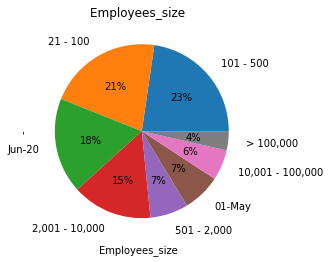

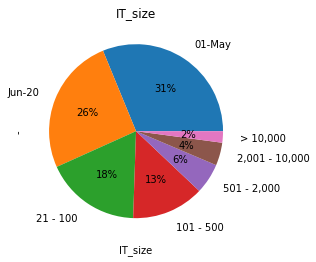

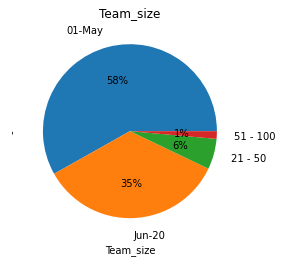

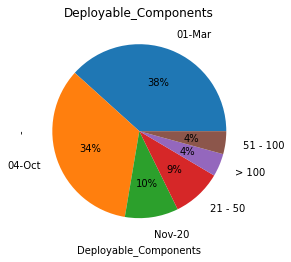

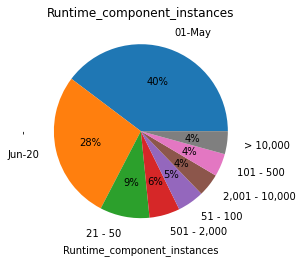

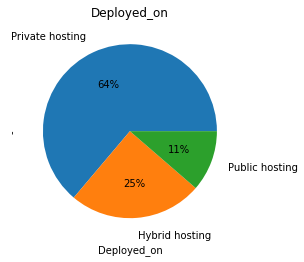

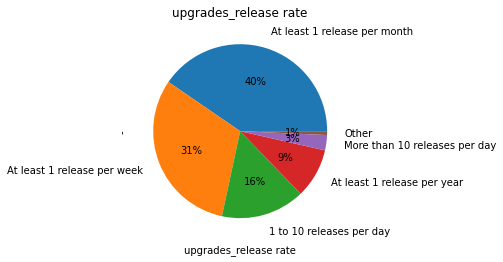

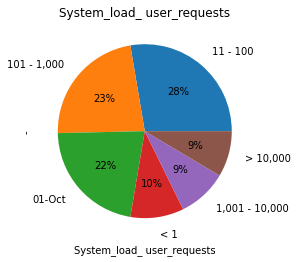

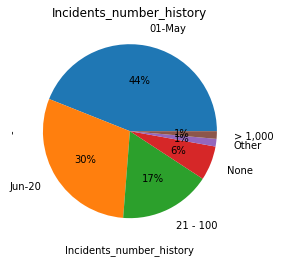

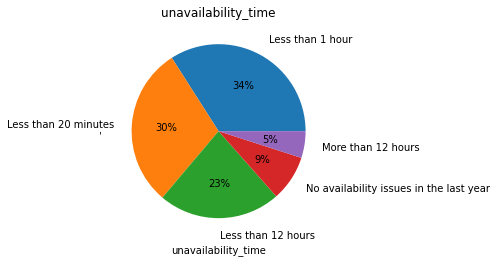

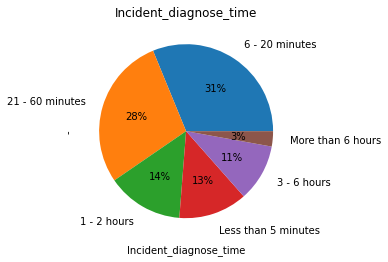

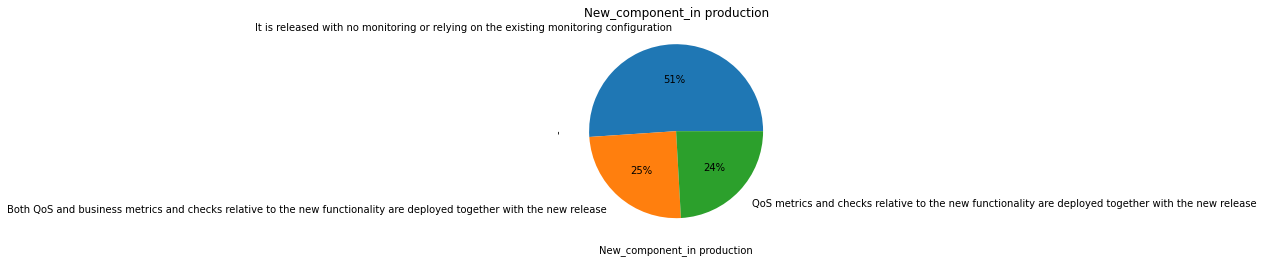

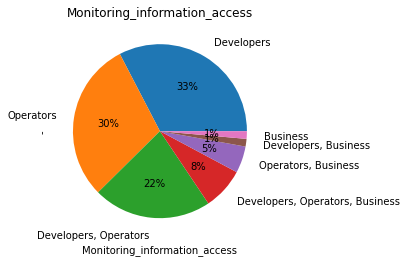

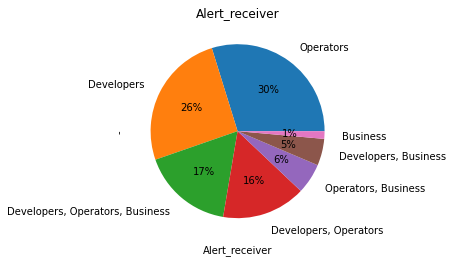

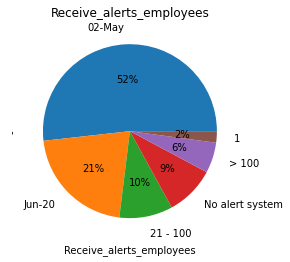

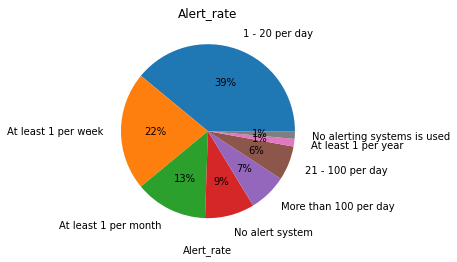

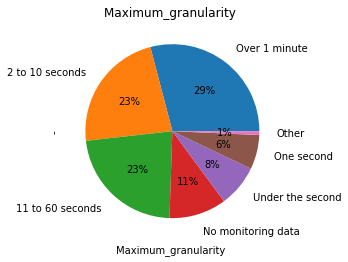

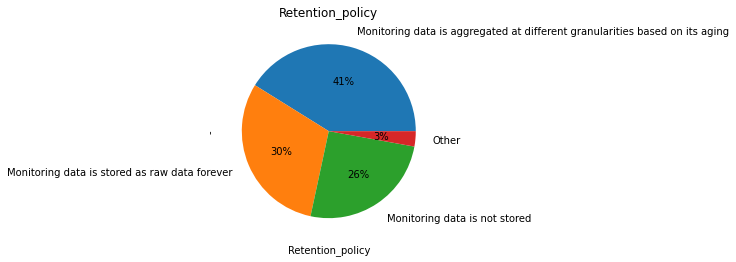

In [68]:
for column in categorical_features:
    
    if len(list(df[column].unique())) <= 8:
        labels=df[column].value_counts().index
        df[column].value_counts().head(8).plot.pie(labels=labels,autopct='%1.0f%%',labeldistance=1.2)
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

# check the composition of data  in each categorical column which are >=12 categories

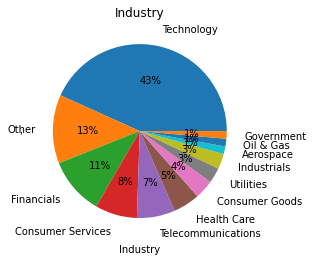

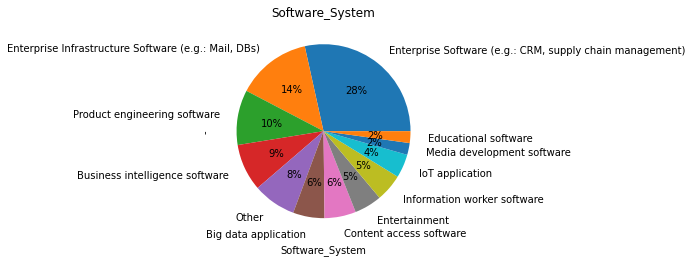

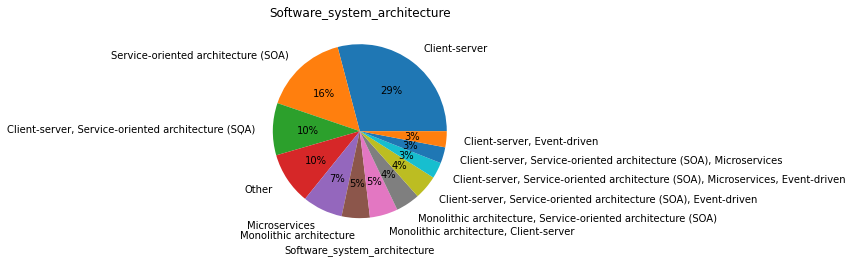

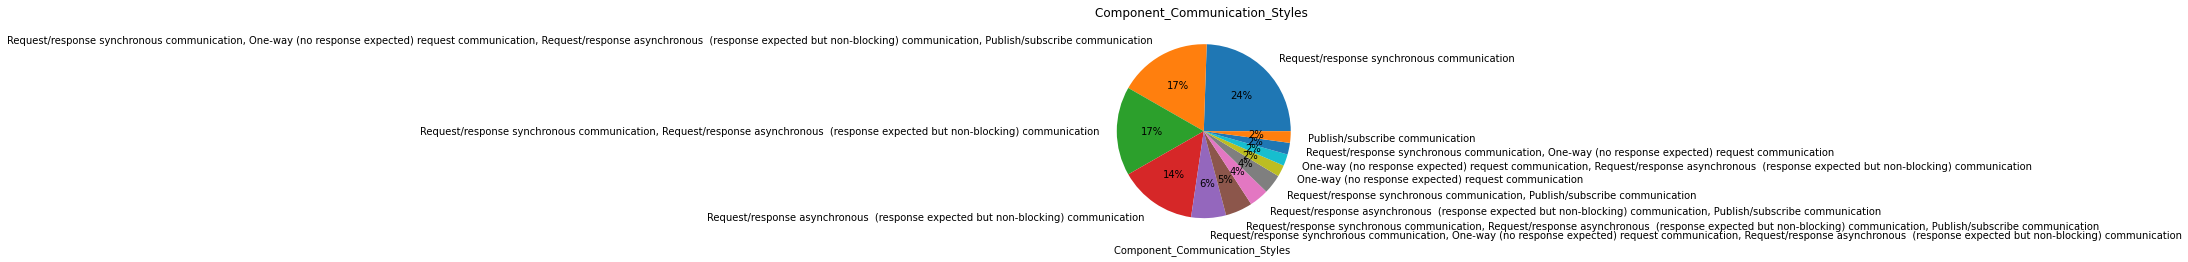

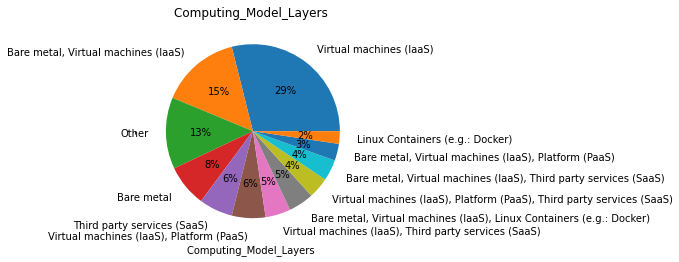

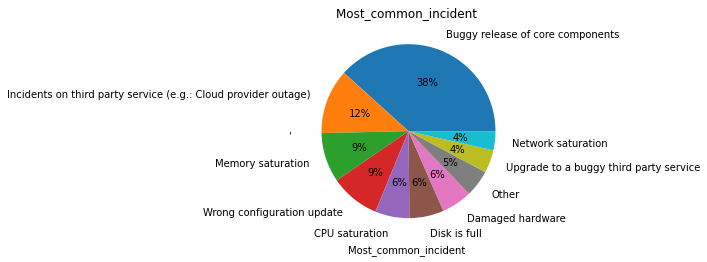

In [69]:
for column in categorical_features:
    
    if len(list(df[column].unique())) > 8 and len(list(df[column].unique()))<=20 :
        df[column].value_counts().head(12).plot.pie(autopct='%1.0f%%',labeldistance=1.2)
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

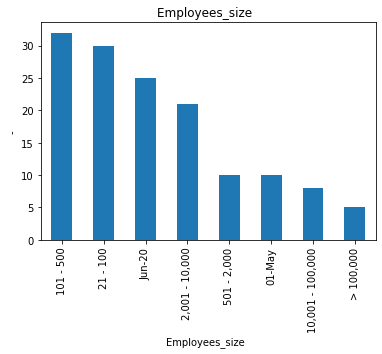

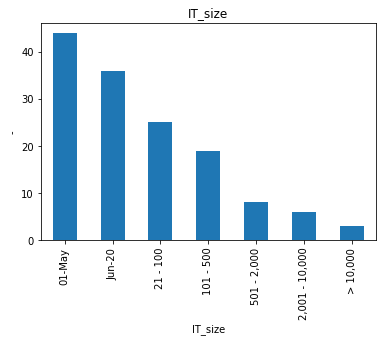

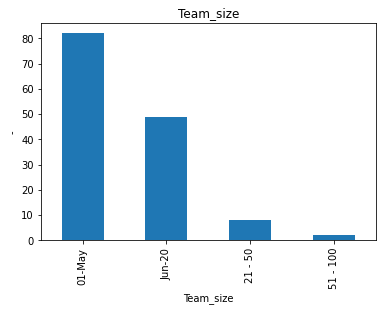

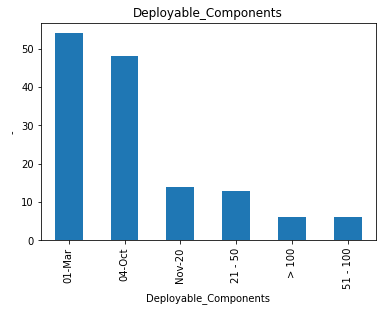

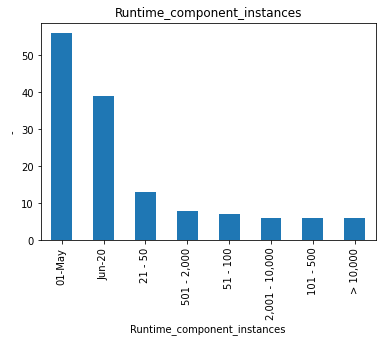

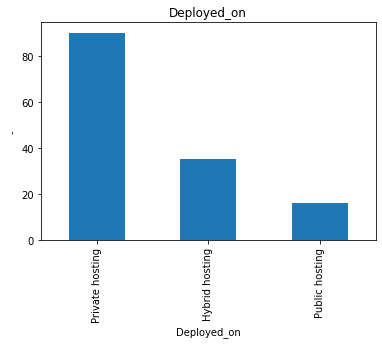

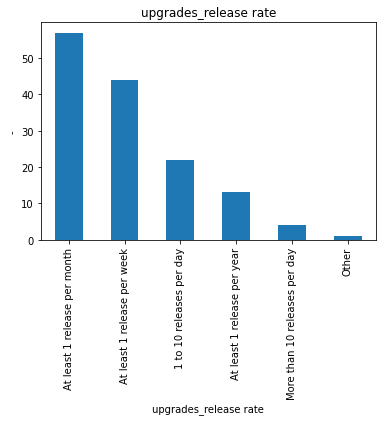

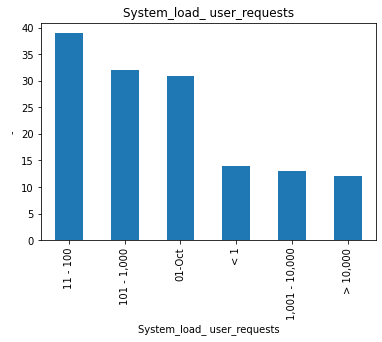

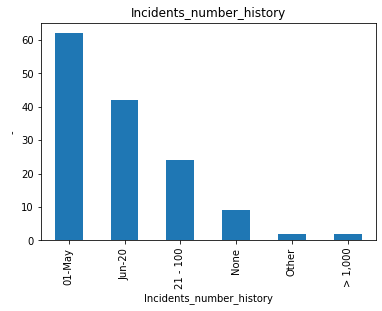

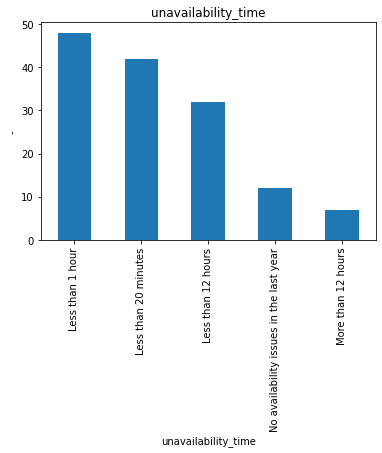

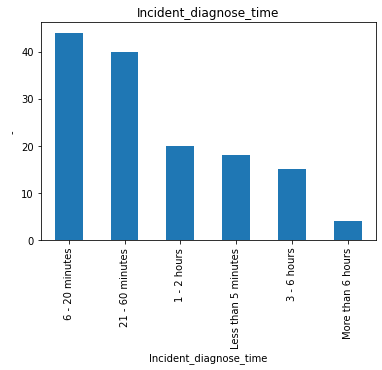

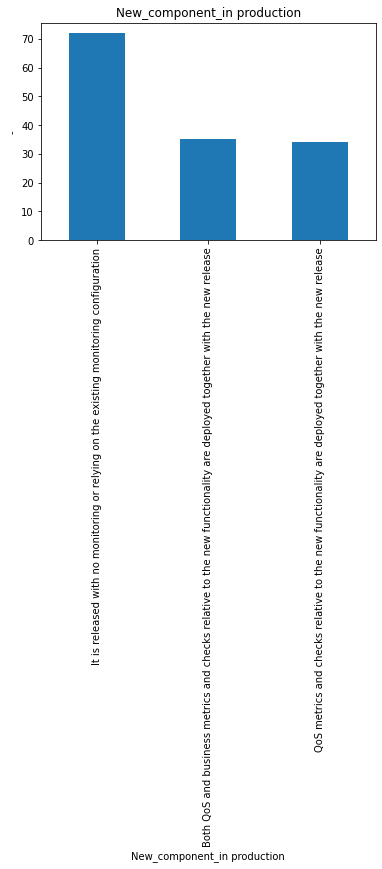

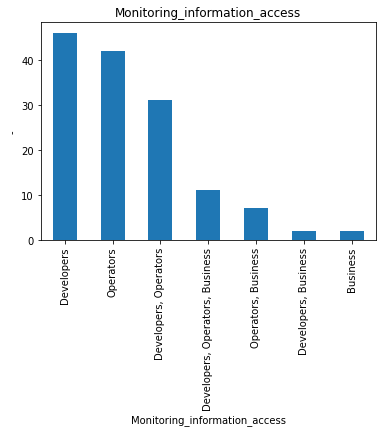

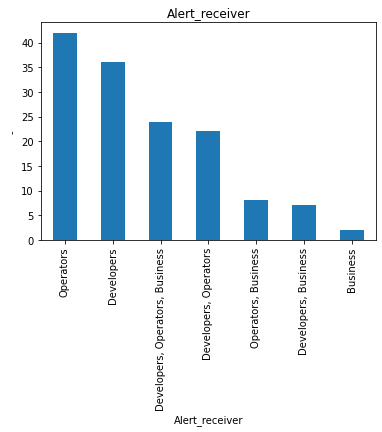

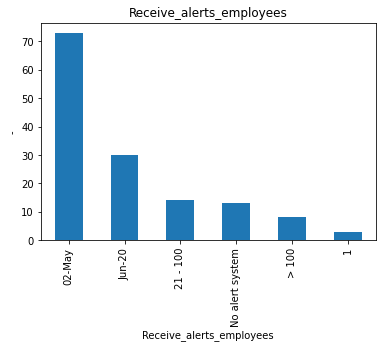

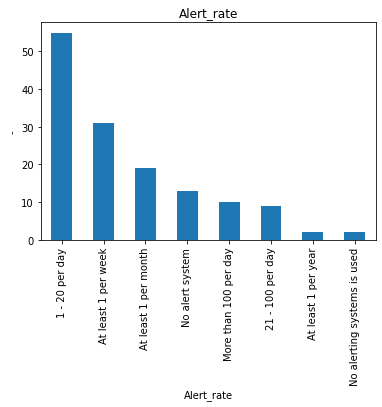

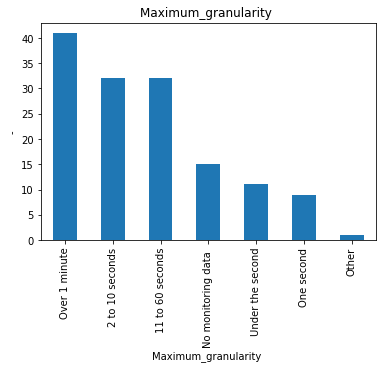

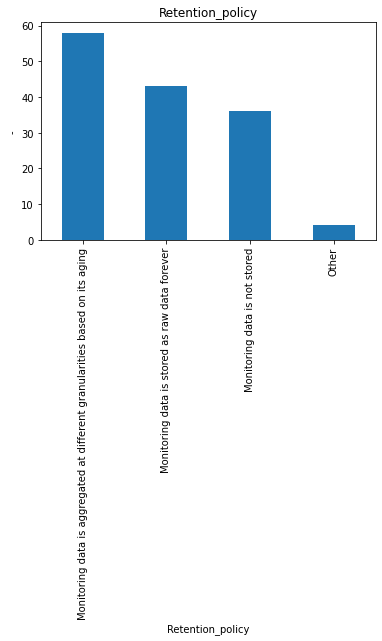

In [70]:
for column in categorical_features:
    
    if len(list(df[column].unique())) <= 8:
        df[column].value_counts().head(8).plot.bar()
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

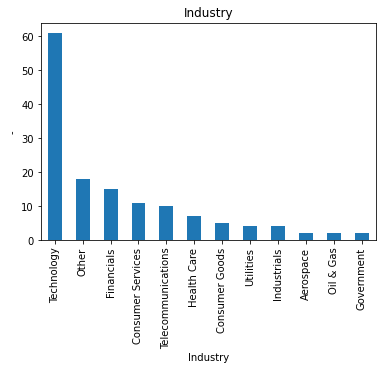

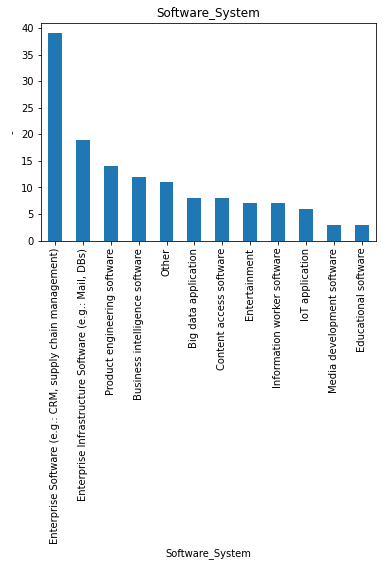

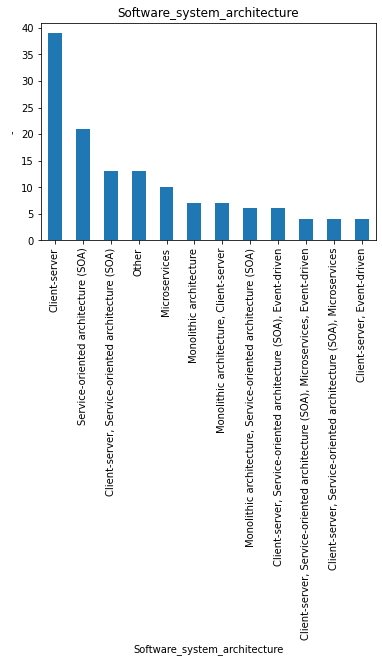

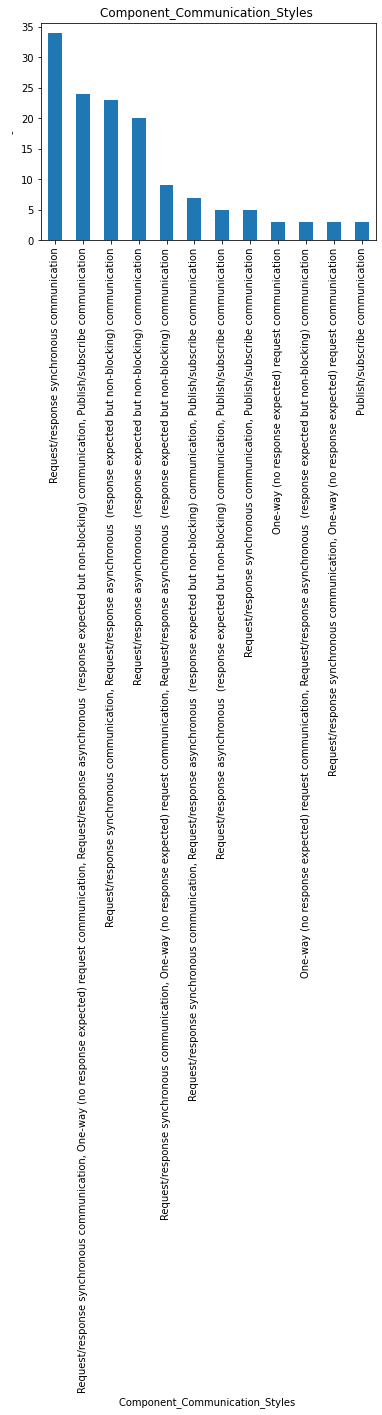

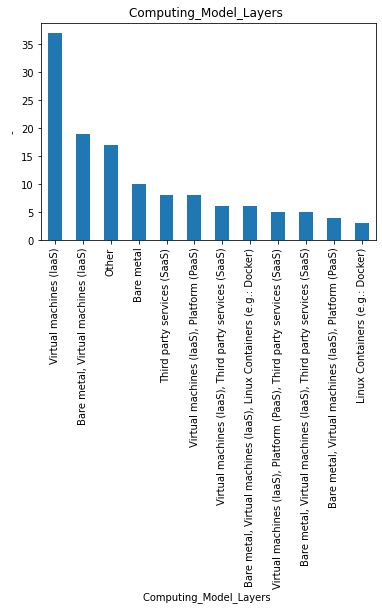

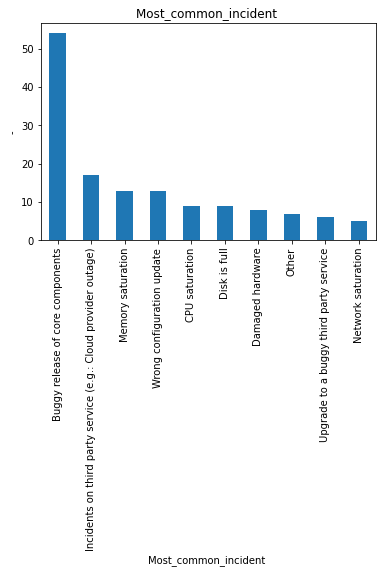

In [71]:
for column in categorical_features:
    
    if len(list(df[column].unique())) > 8 and len(list(df[column].unique()))<=20 :
        df[column].value_counts().head(12).plot.bar()
        plt.xlabel(column)
        plt.ylabel('-')
        plt.title(column)
        plt.show()

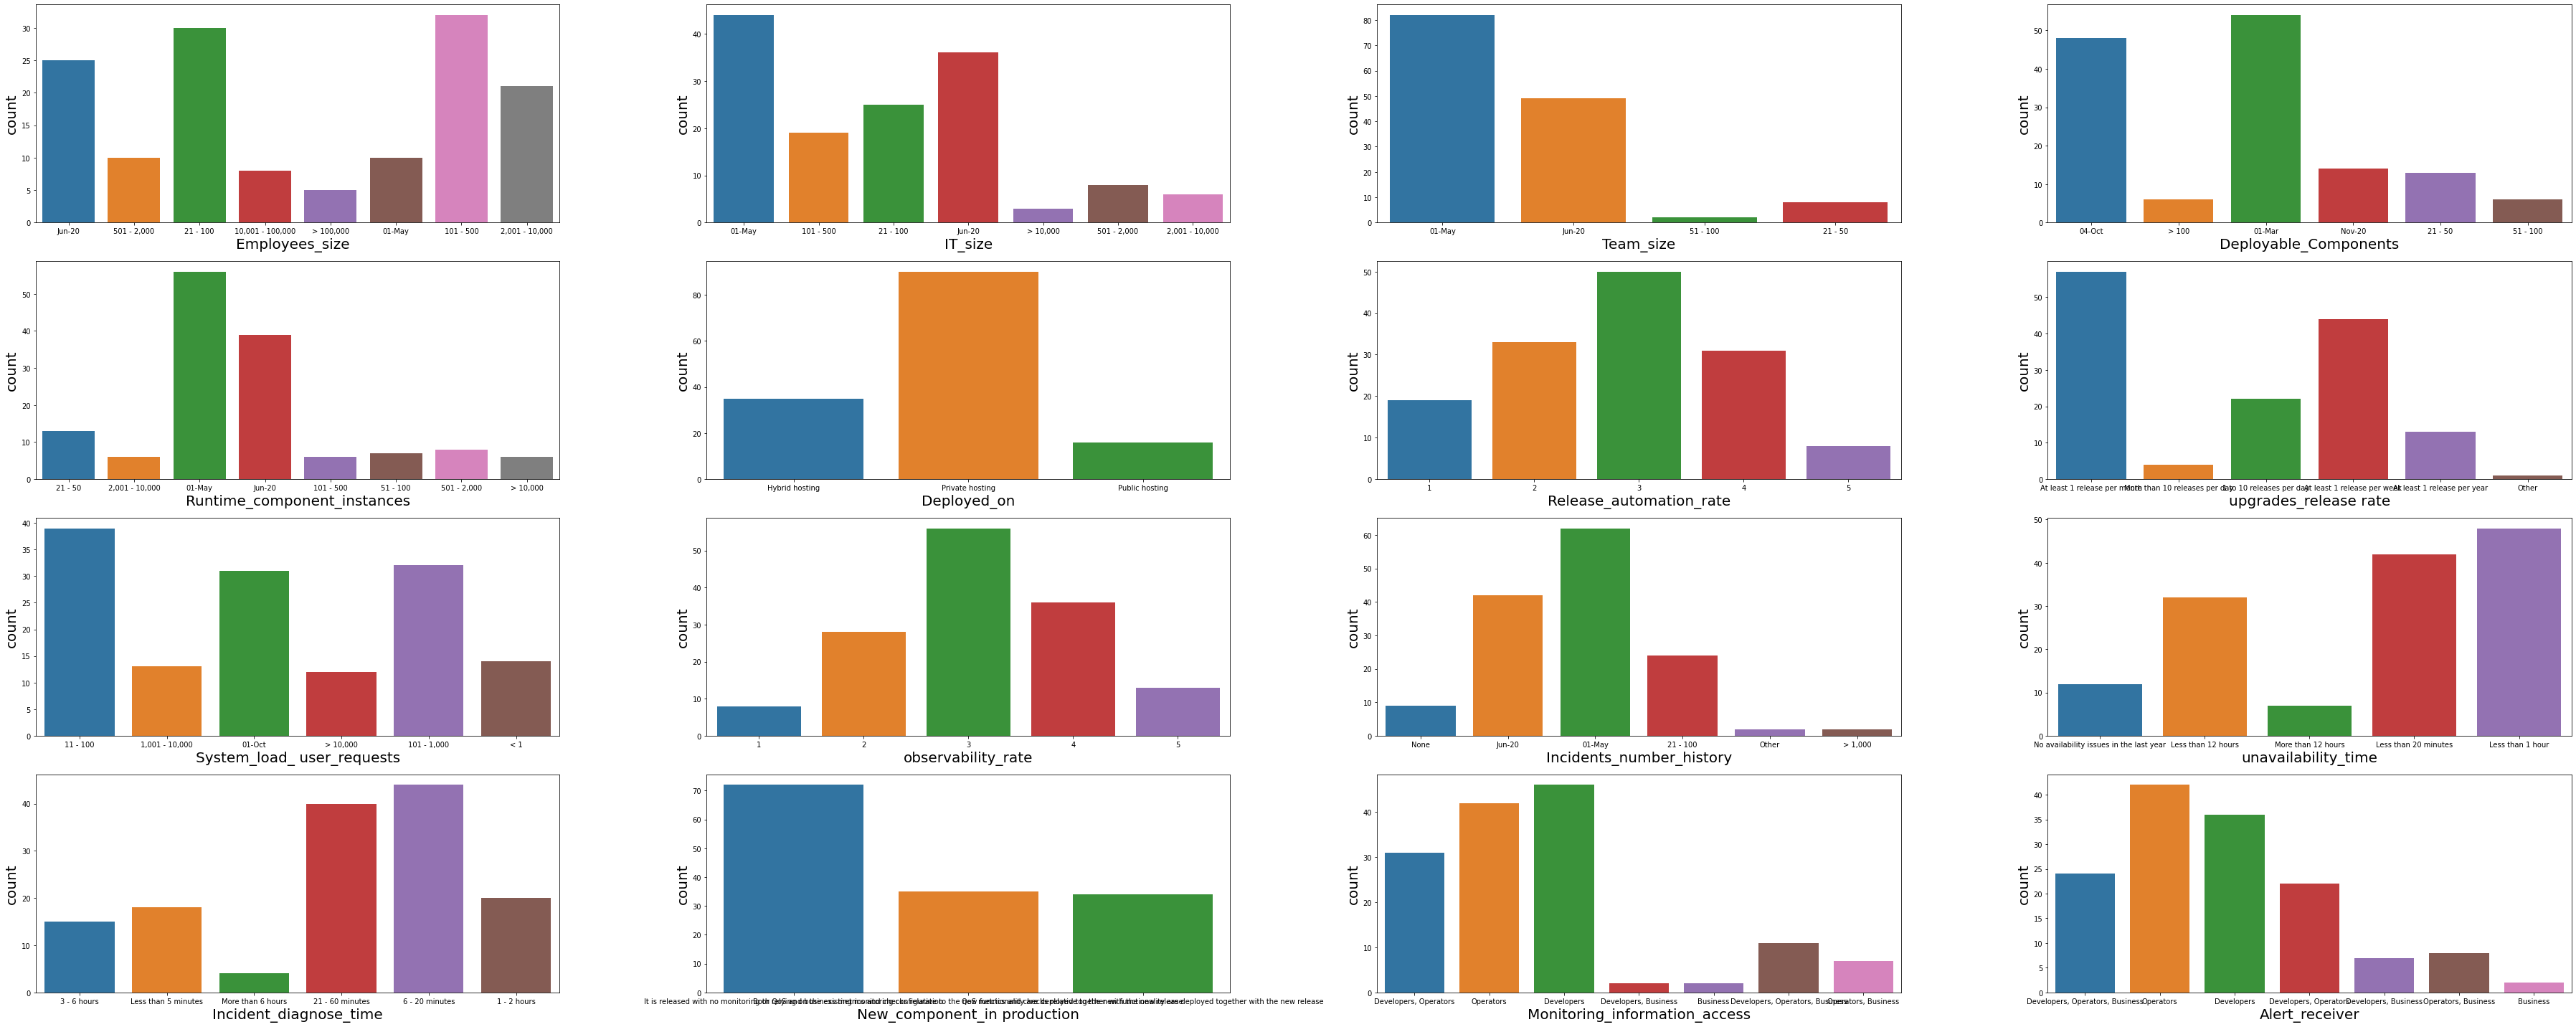

In [72]:
#Let us treat the data as the description of data is too lengthy and missing values imputation is wrong
#'Component_Communication_Styles ','Third_party_tools '''Incident_first_check_metrics'
#categorical values  for f1,f2,f3,f4 ( x values)
plotnumber=1
plt.figure(figsize=(50,20))
for column in df:
    if len(list(df[column].unique())) <= 8:
        df[column].sort_values(ascending=True)
        if plotnumber<=16:
            ax = plt.subplot(4,4,plotnumber)
            sns.countplot(column,data=df)
            plt.xlabel(column,fontsize=20)
            plt.ylabel('count',fontsize=20)
    
        
        plotnumber+=1
plt.tight_layout()

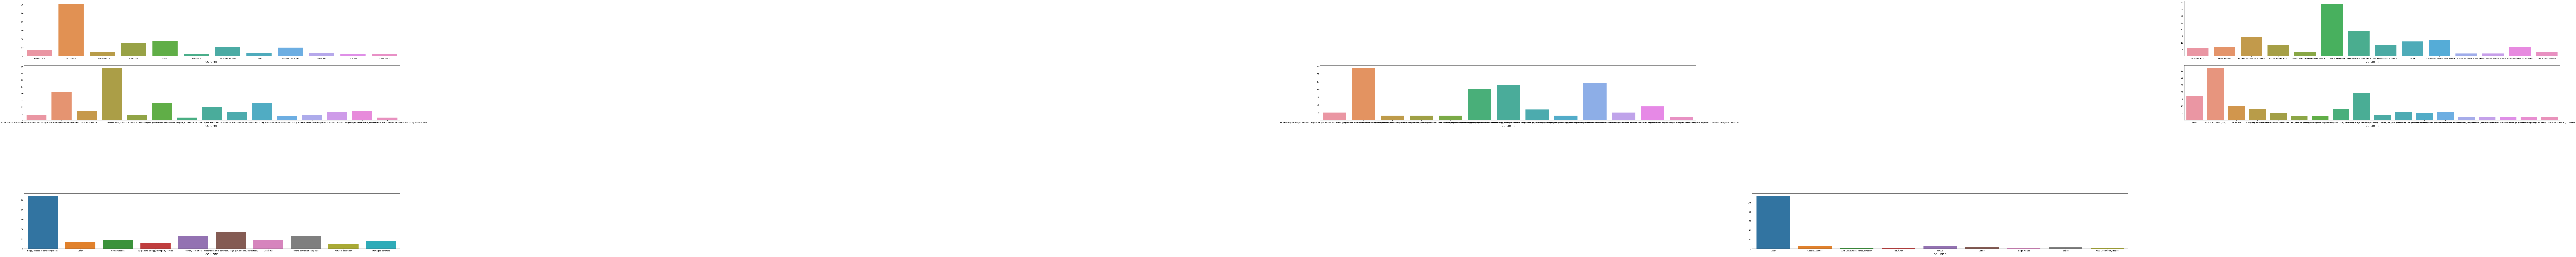

In [68]:
plotnumber=1
plt.figure(figsize=(200,20))
for column in df:
    
        df[column].sort_values(ascending=True)
        if len(list(df[column].unique())) > 8 and len(list(df[column].unique()))<=20 :
            ax = plt.subplot(4,6,plotnumber)
            sns.countplot(column,data=df)
            plt.xlabel('column',fontsize=20)
            plt.ylabel('-',fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [73]:

df.columns

Index(['Industry', 'Employees_size  ', 'IT_size', 'Team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', 'Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'Problem_discover',
       'Incident_first_check_metrics', 'Most_common_incident ',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'New_component_in production',
       'Monitoring_information_access', 'Alert_receiver',
       'Receive_alerts_employees', 'Alert_rate', 'Maximum_granularity ',
       'Retention_policy', 'adoption_main_obstacles'],
      dtype='object')

In [113]:
#Label Encoding 
 
    
categorical_col=['Employees_size  ', 'IT_size', 'Team_size',
       'LifeCycle_Software', 'Software_System', 'Software_system_architecture',
       'Deployable_Components', 'Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'Problem_discover',
       'Incident_first_check_metrics', 'Most_common_incident ',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'New_component_in production',
       'Monitoring_information_access', 'Alert_receiver',
       'Receive_alerts_employees', 'Alert_rate', 'Maximum_granularity ',
       'Retention_policy', 'adoption_main_obstacles','Industry']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])  

In [64]:
# Let us check the columns for one hot encoding and label encoding
#One Hot Encoding

#['Industry','LifeCycle_Software','Software_System', 'Software_system_architecture',''upgrades_release rate'

dummies = pd.get_dummies(df[['Industry']], drop_first=True)
df=pd.concat([df.drop(['Industry',],axis=1), dummies],axis=1)
 
 

In [8]:
df.columns

Index(['Employees_size  ', 'IT_size', 'Team_size', 'LifeCycle_Software',
       'Software_System', 'Software_system_architecture',
       'Deployable_Components', 'Runtime_component_instances',
       'Component_Communication_Styles ', 'Deployed_on',
       'Computing_Model_Layers ', 'Release_automation_rate',
       'upgrades_release rate', 'System_load_ user_requests',
       'observability_rate', 'Problem_discover',
       'Incident_first_check_metrics', 'Most_common_incident ',
       'Incidents_number_history', 'unavailability_time',
       'Incident_diagnose_time', 'New_component_in production',
       'Monitoring_information_access', 'Alert_receiver',
       'Receive_alerts_employees', 'Alert_rate', 'Maximum_granularity ',
       'Retention_policy', 'adoption_main_obstacles',
       'Industry_Consumer Goods', 'Industry_Consumer Services',
       'Industry_Financials', 'Industry_Government', 'Industry_Health Care',
       'Industry_Industrials', 'Industry_Oil & Gas', 'Industry_Ot

In [114]:
df.head(10)

,Industry,Employees_size,IT_size,Team_size,LifeCycle_Software,Software_System,Software_system_architecture,Deployable_Components,Runtime_component_instances,Component_Communication_Styles,...,unavailability_time,Incident_diagnose_time,New_component_in production,Monitoring_information_access,Alert_receiver,Receive_alerts_employees,Alert_rate,Maximum_granularity,Retention_policy,adoption_main_obstacles
0,5,7,0,0,18,10,5,1,3,5,...,4,2,1,3,4,0,4,1,0,12
1,9,5,1,3,23,7,13,4,2,6,...,1,4,0,5,5,2,5,3,0,12
2,9,4,3,3,23,13,7,0,0,0,...,3,5,0,1,1,4,0,5,2,10
3,9,4,3,0,5,13,0,1,7,1,...,2,4,1,3,3,0,3,5,0,22
4,9,7,6,0,4,0,0,1,7,7,...,2,1,1,2,2,0,0,1,1,4
5,1,1,3,0,10,11,13,1,1,5,...,0,1,0,5,5,0,3,5,1,26
6,9,4,0,0,4,6,0,0,0,6,...,2,4,1,5,5,0,0,0,2,22
7,9,7,0,0,23,6,0,0,0,4,...,2,3,0,5,5,0,0,0,2,7
8,3,6,6,2,24,5,0,5,5,11,...,2,1,2,5,5,4,0,0,0,10
9,9,4,6,0,5,2,4,1,7,12,...,0,3,2,1,1,4,0,0,0,12


# Feature Scaling

In [115]:
from sklearn.preprocessing import StandardScaler 
X=df
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [116]:
from sklearn.decomposition import PCA
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
#pca.fit_transform(X_scaled) 
pca.fit(X_scaled)
X_prinicipal=pca.transform(X_scaled)
#X_prinicipal = pd.DataFrame(X_prinicipal) 
#X_prinicipal.columns = ['P1', 'P2'] 
  
#X_prinicipal.head(2)

In [117]:
X_prinicipal.shape

(141, 2)

Text(0, 0.5, 'Second Prinicipal Component')

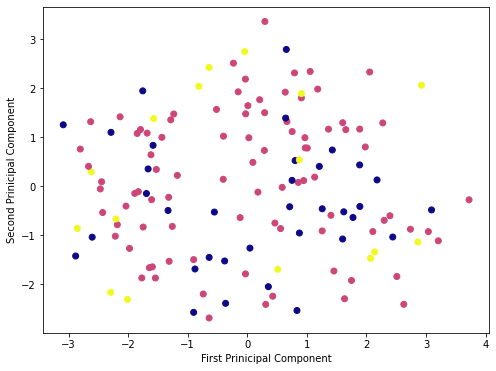

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(X_prinicipal[:,0],X_prinicipal[:,1],c=df['Deployed_on'],cmap='plasma')
plt.xlabel('First Prinicipal Component')
plt.ylabel('Second Prinicipal Component')


# Clustering Algorithm kmeans


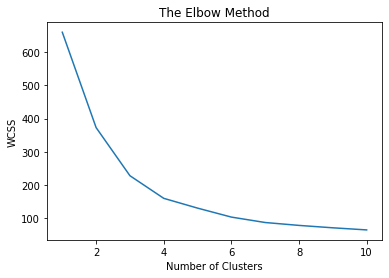

In [119]:
#Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11) :
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X_prinicipal)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

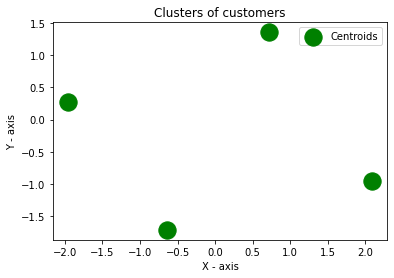

In [120]:
#fitting  K Means to the dataset

kmeansmodel=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(X_prinicipal)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.


plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1],s=300,c='green',label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.legend()
plt.show()

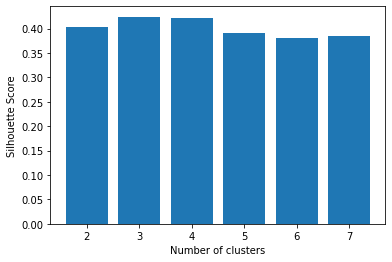

In [121]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_prinicipal, KMeans(n_clusters = n_cluster).fit_predict(X_prinicipal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [122]:
kmeansmodel.cluster_centers_

array([[-0.64408693, -1.71117148],
       [-1.96080042,  0.28089446],
       [ 0.72356999,  1.3558205 ],
       [ 2.0906093 , -0.94588398]])

['purple', 'green', 'blue', 'purple']


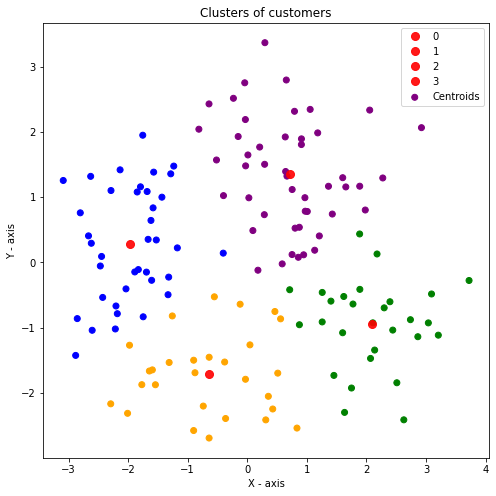

In [123]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in y_kmeans]
print (colored[0:4])
plt.scatter(X_prinicipal[:,0],X_prinicipal[:,1], color = colored,label='Centroids')
for ci,c in enumerate(kmeansmodel.cluster_centers_):
    plt.plot(c[0], c[1], 'o', markersize=8, color='Red', alpha=0.9, label=''+str(ci))
plt.title('Clusters of customers')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.legend()
plt.show()


In [124]:
X['target'] =y_kmeans

<AxesSubplot:>

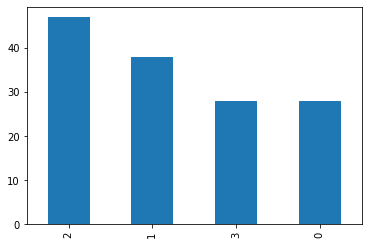

In [125]:
X['target'].value_counts().plot.bar()

In [128]:

df[df['target']==2].head(5)

,Industry,Employees_size,IT_size,Team_size,LifeCycle_Software,Software_System,Software_system_architecture,Deployable_Components,Runtime_component_instances,Component_Communication_Styles,...,Incident_diagnose_time,New_component_in production,Monitoring_information_access,Alert_receiver,Receive_alerts_employees,Alert_rate,Maximum_granularity,Retention_policy,adoption_main_obstacles,target
0,5,7,0,0,18,10,5,1,3,5,...,2,1,3,4,0,4,1,0,12,2
3,9,4,3,0,5,13,0,1,7,1,...,4,1,3,3,0,3,5,0,22,2
4,9,7,6,0,4,0,0,1,7,7,...,1,1,2,2,0,0,1,1,4,2
6,9,4,0,0,4,6,0,0,0,6,...,4,1,5,5,0,0,0,2,22,2
7,9,7,0,0,23,6,0,0,0,4,...,3,0,5,5,0,0,0,2,7,2
